In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormapSS

In [4]:
userid = ["101", "106", "108", "115", "117", "124", "126", "150", "151", "136", "161", "103", "105", "128", "129",
          "130", "131", "132", "133", "134"]
gender = ["F", "F", "F", "F", "F", "M", "F", "M", "M", "F", "F", "F", "F", "M", "F", "M", "F", "M", "F", "M"]
age = [19, 21, 19, 20, 21, 21, 20, 21, 22, 20, 21, 21, 21, 22, 21, 20, 21, 22, 20, 23]
estimatedsalary = [45000, 50000, 25000, 30000, 45000, 35000, 55000, 60000, 30000, 35000, 40000, 50000, 30000, 35000,
                   40000, 45000, 50000, 55000, 35000, 20000]
purchased = [0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [5]:
data_dict = {'User Id': userid, 'Gender': gender, 'Age': age, 'EstimatedSalary': estimatedsalary, 'Purchased': purchased}
dataset = pd.DataFrame(data_dict)

In [9]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[0 2]
 [2 1]]


In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)

Accuracy :  0.2


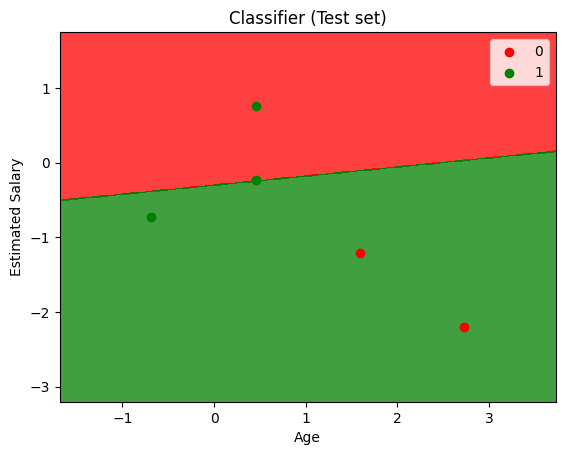

In [13]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green')).colors[i], label=j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
